In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\580713916.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
rwine=pd.read_csv("winequality-red.csv")
rwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
rwine.shape

(1599, 12)

In [5]:
rwine.size

19188

In [6]:
rwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
rwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
rwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
rwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
rwine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
bins=(2,6.5,8)
labels=["bad","good"]
rwine['quality']=pd.cut(x=rwine['quality'],bins=bins,labels=labels)

In [12]:
rwine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
rwine['quality']=labelencoder_y.fit_transform(rwine['quality'])

In [14]:
rwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
rwine['quality'].unique()

array([0, 1])

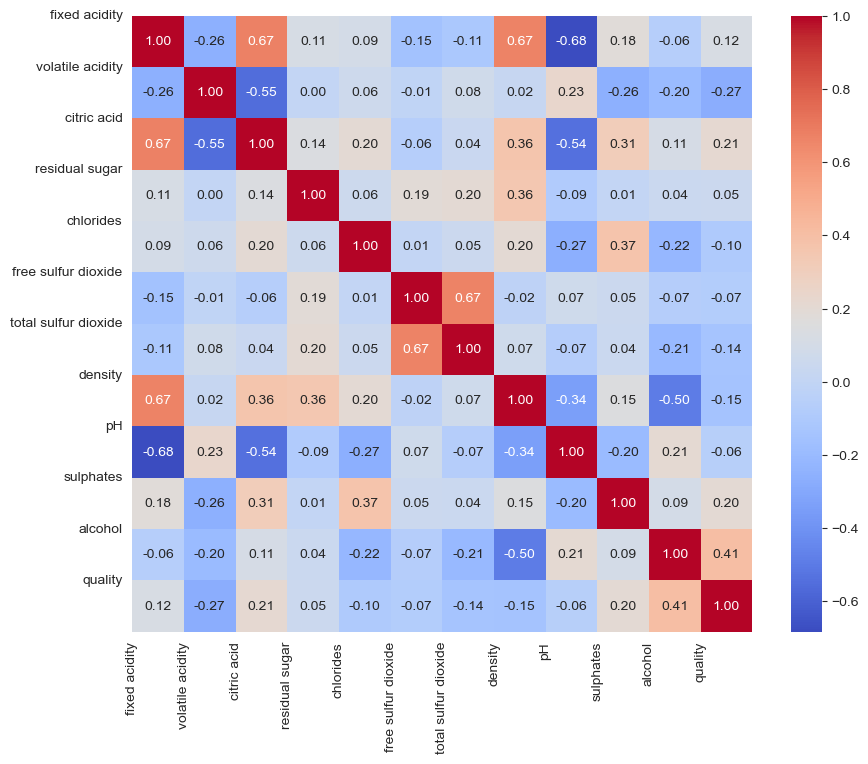

In [16]:
corr=rwine.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\3721390748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['fixed acidity'],ax=axes[0])


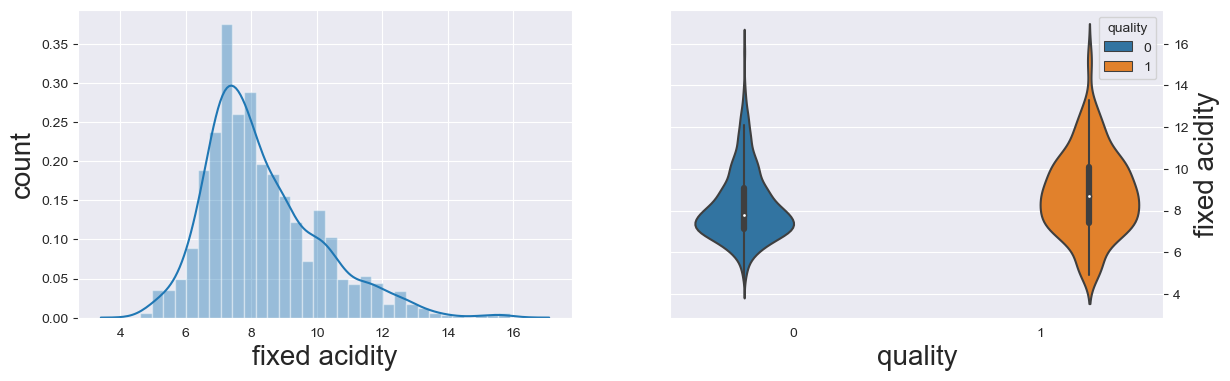

In [25]:
f,axes=plt.subplots(1,2,figsize=(14,4))

sns.distplot(rwine['fixed acidity'],ax=axes[0])
axes[0].set_xlabel('fixed acidity',fontsize=20)
axes[0].set_ylabel('count',fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x='quality',y='fixed acidity',data=rwine,hue='quality',ax=axes[1])
axes[1].set_xlabel('quality',fontsize=20)
axes[1].set_ylabel('fixed acidity',fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()



C:\Users\theja\AppData\Local\Temp\ipykernel_1484\667239992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['volatile acidity'],ax=axes[0])


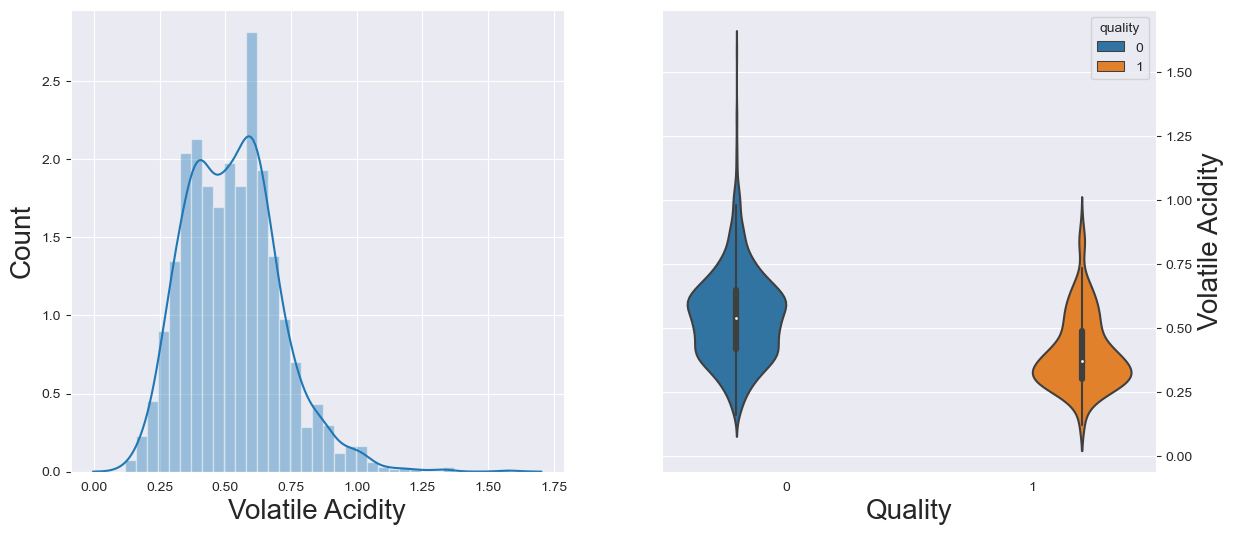

In [28]:
f,axes=plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['volatile acidity'],ax=axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Volatile Acidity', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()


C:\Users\theja\AppData\Local\Temp\ipykernel_1484\1685861024.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['citric acid'], ax = axes[0])


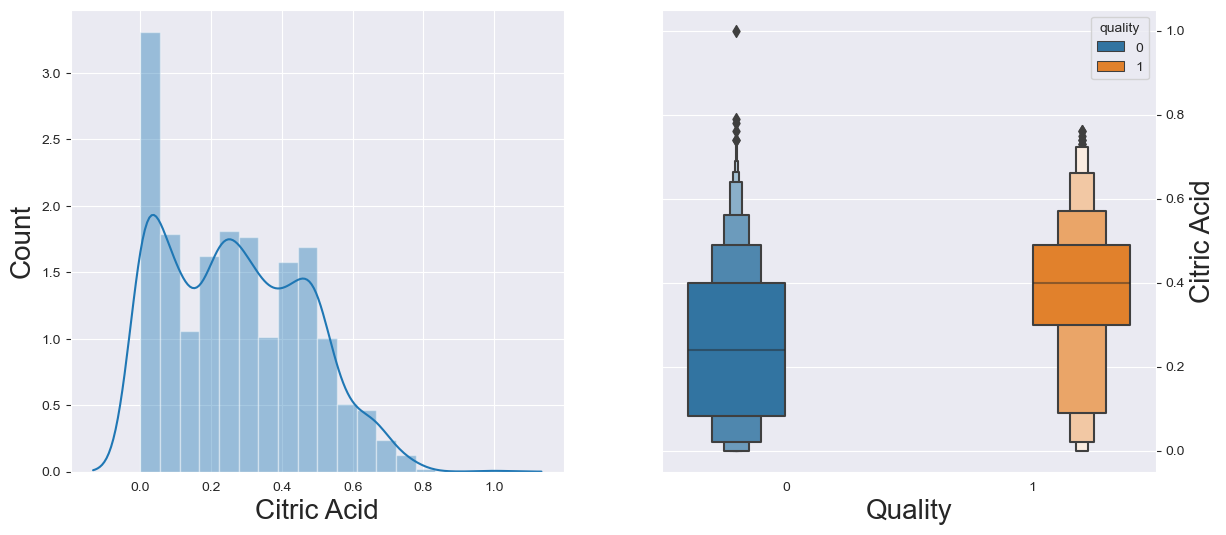

In [29]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Citric Acid', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [30]:
rwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\312525281.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['residual sugar'], ax = axes[0])


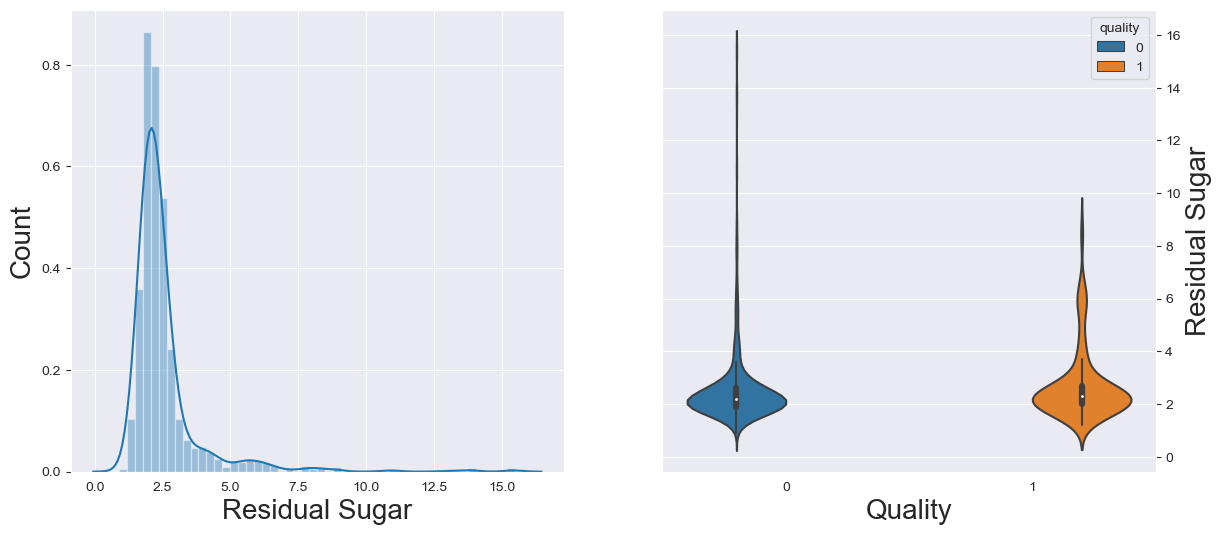

In [31]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Residual Sugar', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\638873596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['chlorides'], ax = axes[0])


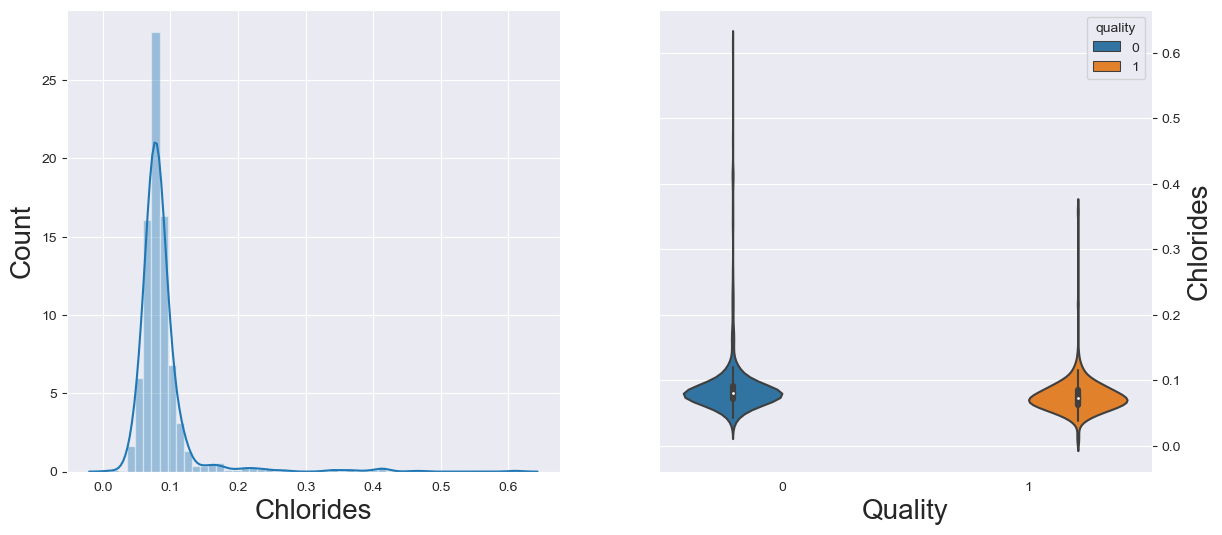

In [33]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Chlorides', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\3596201976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['free sulfur dioxide'], ax = axes[0,0])
C:\Users\theja\AppData\Local\Temp\ipykernel_1484\3596201976.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['total sulfur dioxi

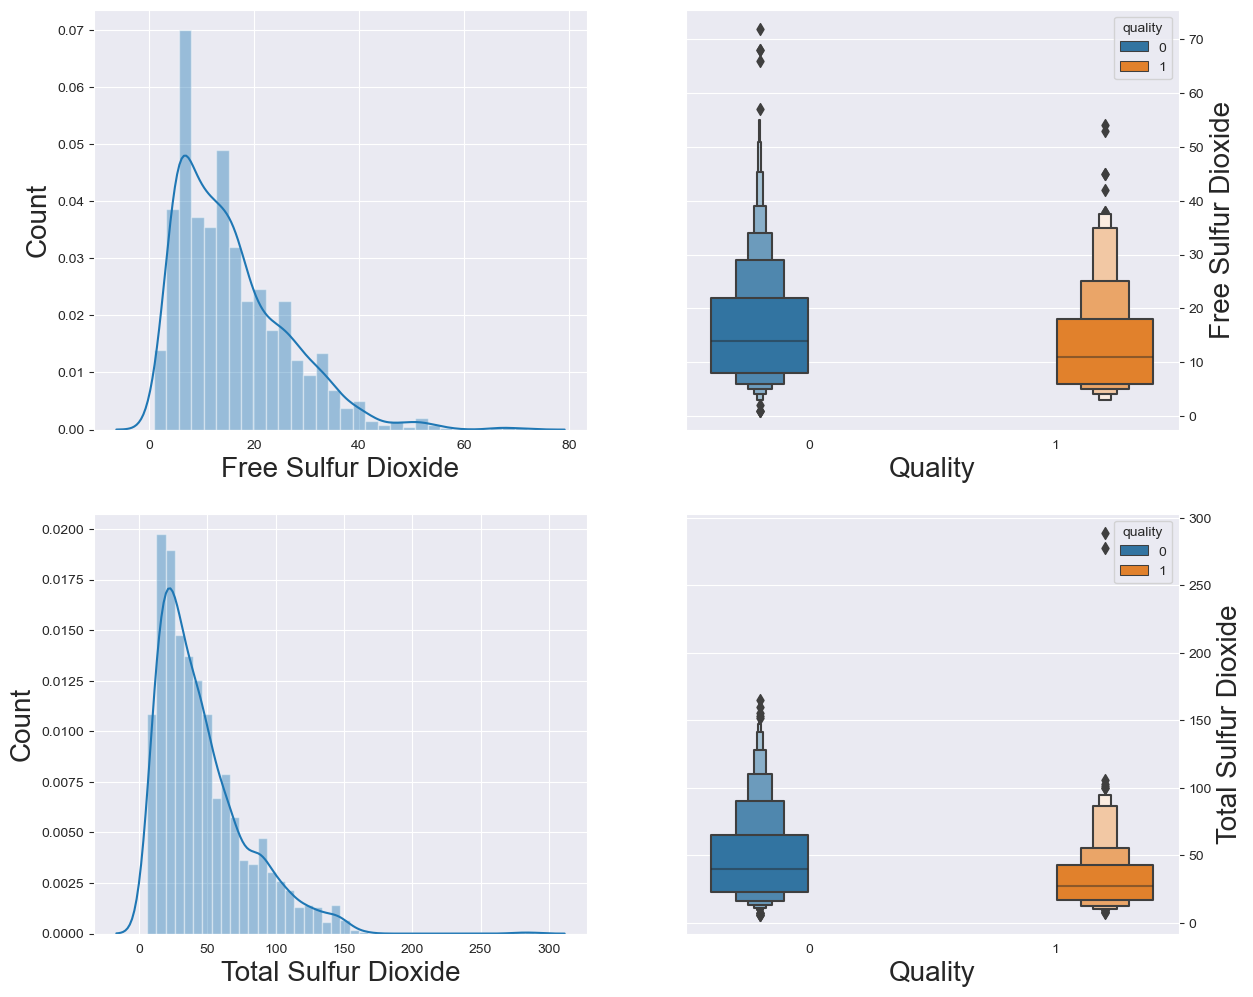

In [36]:
f, axes = plt.subplots(2,2,figsize=(14,12))

sns.distplot(rwine['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=20)
axes[0,0].set_ylabel('Count', fontsize=20)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = rwine, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=20)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=20)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(rwine['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=20)
axes[1,0].set_ylabel('Count', fontsize=20)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = rwine, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=20)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=20)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()


C:\Users\theja\AppData\Local\Temp\ipykernel_1484\2446089433.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['density'], ax = axes[0])


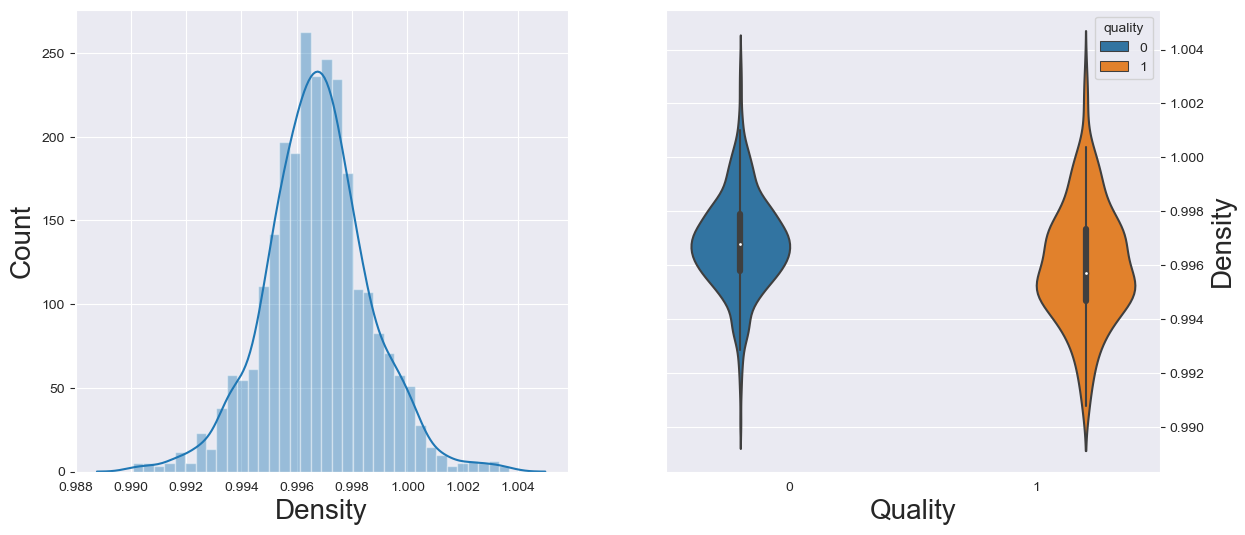

In [37]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Density', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\3584557581.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['pH'], ax = axes[0])


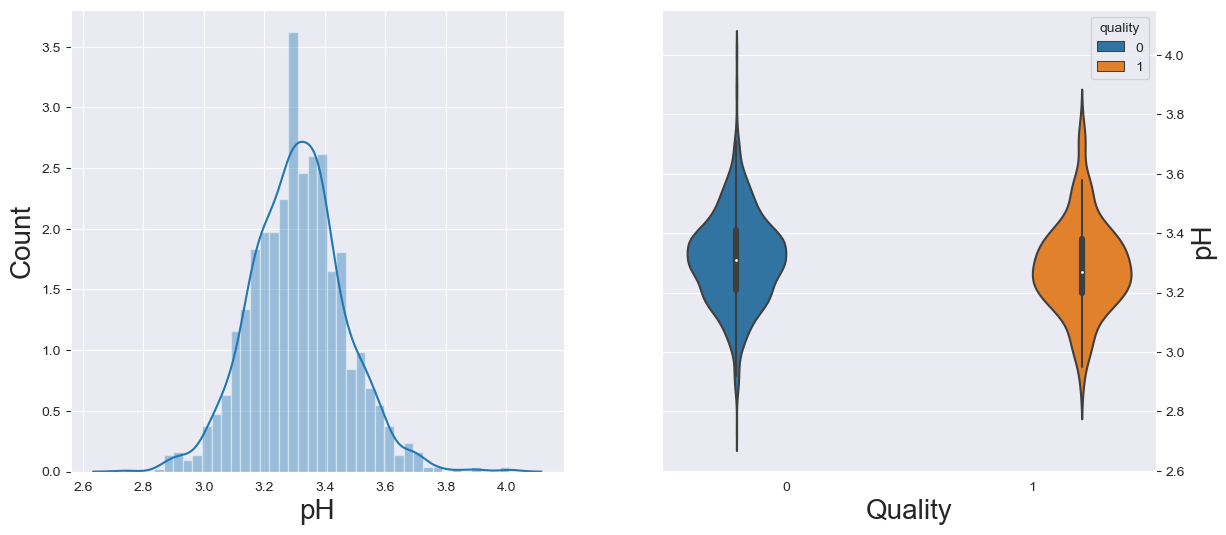

In [38]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('pH', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\2113207071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['sulphates'], ax = axes[0])


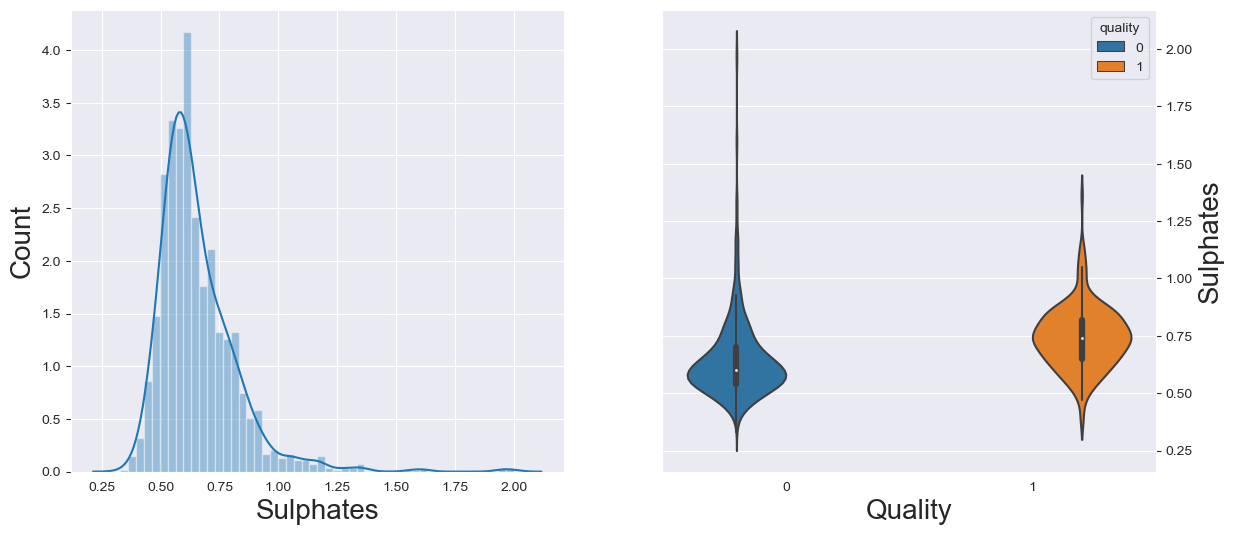

In [39]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = rwine, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Sulphates', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

C:\Users\theja\AppData\Local\Temp\ipykernel_1484\1474005150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rwine['alcohol'], ax = axes[0])


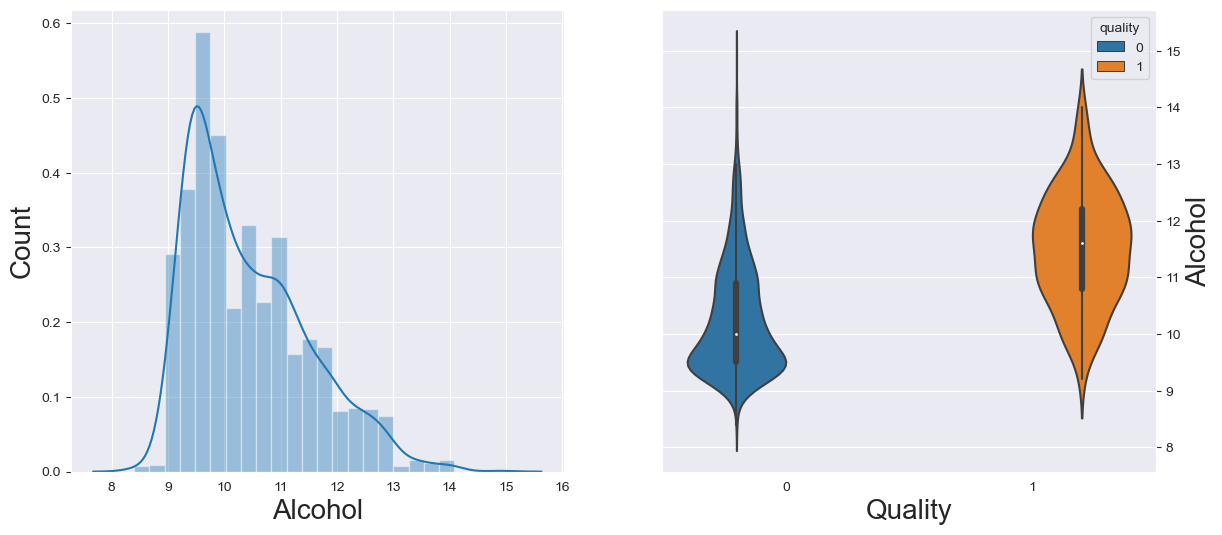

In [40]:
f, axes = plt.subplots(1,2,figsize=(14,6))

sns.distplot(rwine['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = rwine,hue='quality',ax = axes[1]) 
axes[1].set_xlabel('Quality', fontsize=20)
axes[1].set_ylabel('Alcohol', fontsize=20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [41]:
rwine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [43]:
X = rwine.drop('quality', axis = 1).values
y = rwine['quality'].values.reshape(-1,1)

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)
